In [1]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [2]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
pip install pyenchant

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 483.1 kB/s eta 0:00:00


In [5]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
# import enchant

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.io as pio
import plotly.subplots as sp
import plotly.express as px
from plotly.subplots import make_subplots

### Bumble

In [6]:
bumble = pd.read_csv('/content/drive/MyDrive/Dating_App/Google Reviews/bumble_new.csv')
bumble.shape

In [7]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def clean_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = str(text).lower()
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(word=w,pos='v') for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

bumble['content'] = bumble['content'].astype('str')
bumble['clean_text'] = bumble['content'].apply(clean_text)

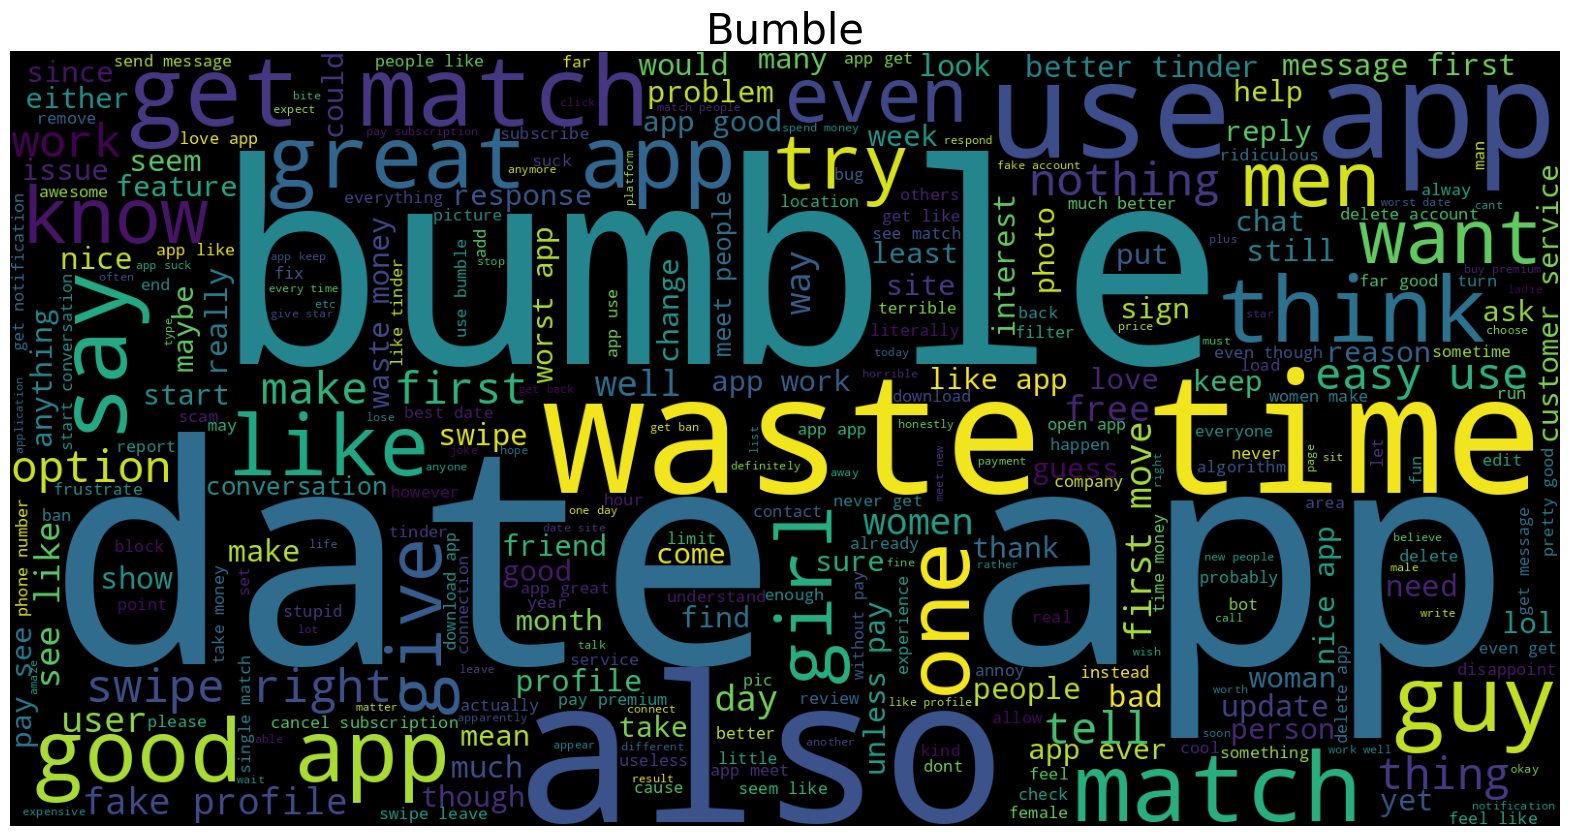

In [11]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=stop_words).generate(str(" ".join(bumble.clean_text)))
plt.axis('off')
plt.title('Bumble', fontsize=30)
plt.imshow(wordcloud)
plt.show()

### Hinge

In [8]:
# Hinge

hinge = pd.read_csv('/content/drive/MyDrive/Dating_App/Google Reviews/hinge_new.csv')
hinge.shape




(63247, 11)

In [9]:
hinge['content'] = hinge['content'].astype('str')
hinge['clean_text'] = hinge['content'].apply(clean_text)

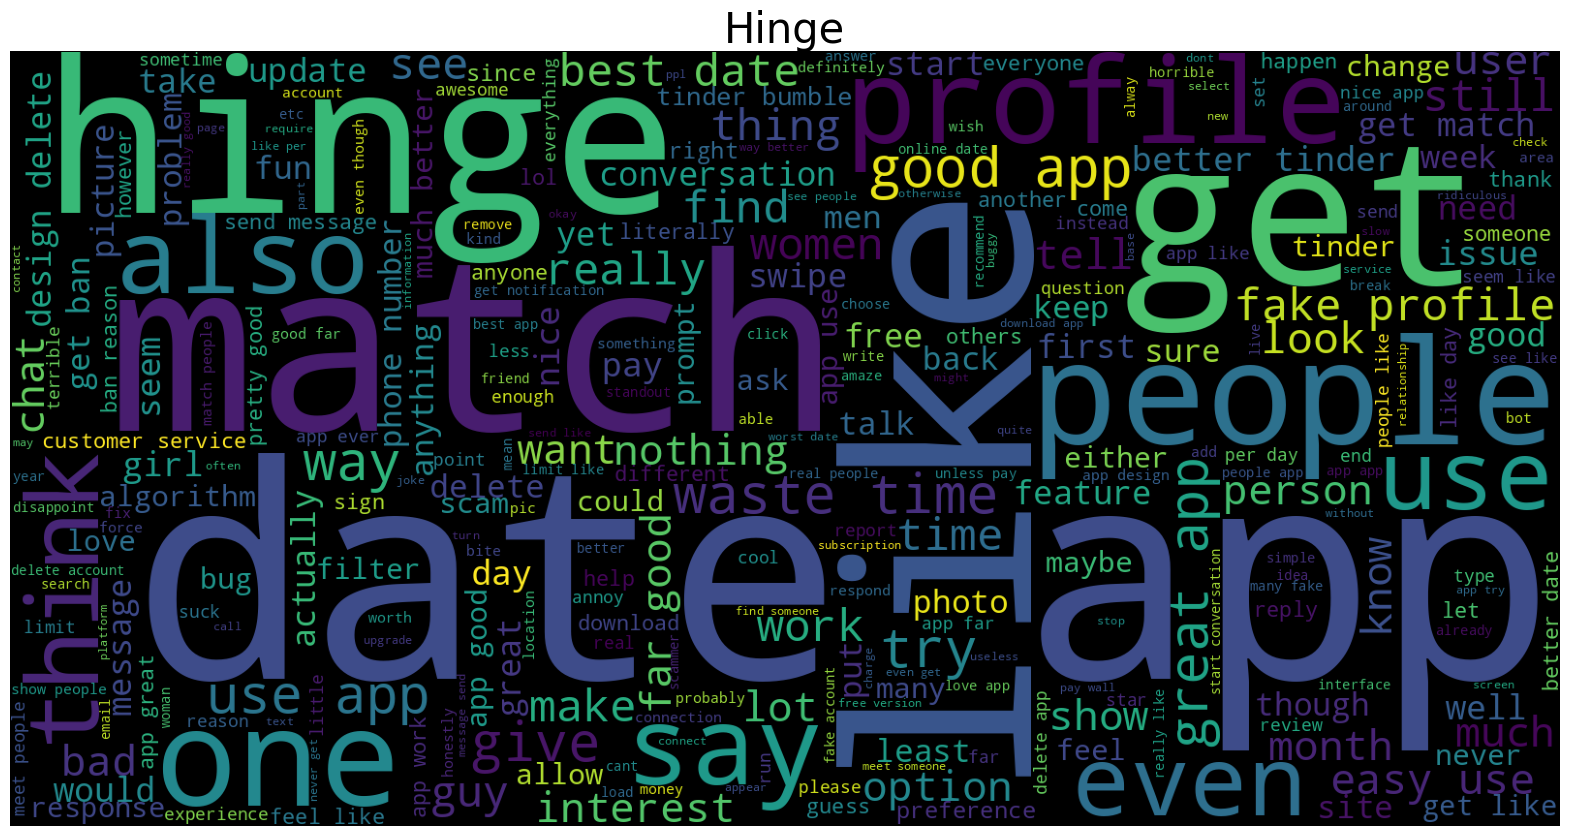

In [10]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=stop_words).generate(str(" ".join(hinge.clean_text)))
plt.axis('off')
plt.title('Hinge', fontsize=30)
plt.imshow(wordcloud)
plt.show()

# Match

In [12]:
# Match

matchdating = pd.read_csv('/content/drive/MyDrive/Dating_App/Google Reviews/match_new.csv')
matchdating.shape

(48296, 11)

In [13]:
matchdating['content'] = matchdating['content'].astype('str')
matchdating['clean_text'] = matchdating['content'].apply(clean_text)

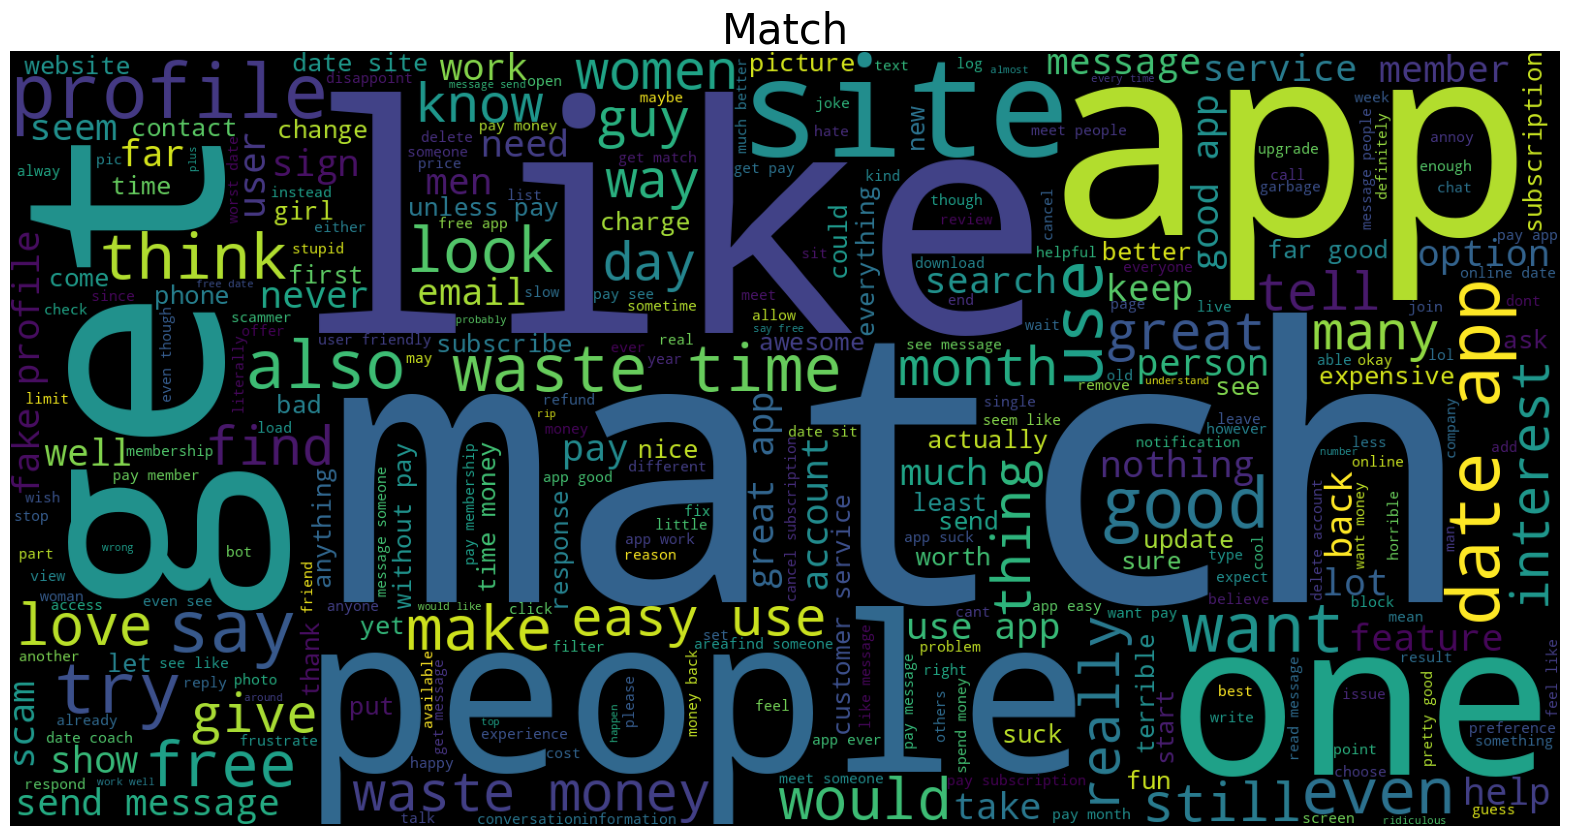

In [14]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=stop_words).generate(str(" ".join(matchdating.clean_text)))
plt.axis('off')
plt.title('Match', fontsize=30)
plt.imshow(wordcloud)
plt.show()

# tinder

In [15]:
tinder = pd.read_csv('/content/drive/MyDrive/Dating_App/Google Reviews/tinder_new.csv')
tinder.shape

(595694, 11)

In [16]:
tinder['content'] = tinder['content'].astype('str')
tinder['clean_text'] = tinder['content'].apply(clean_text)

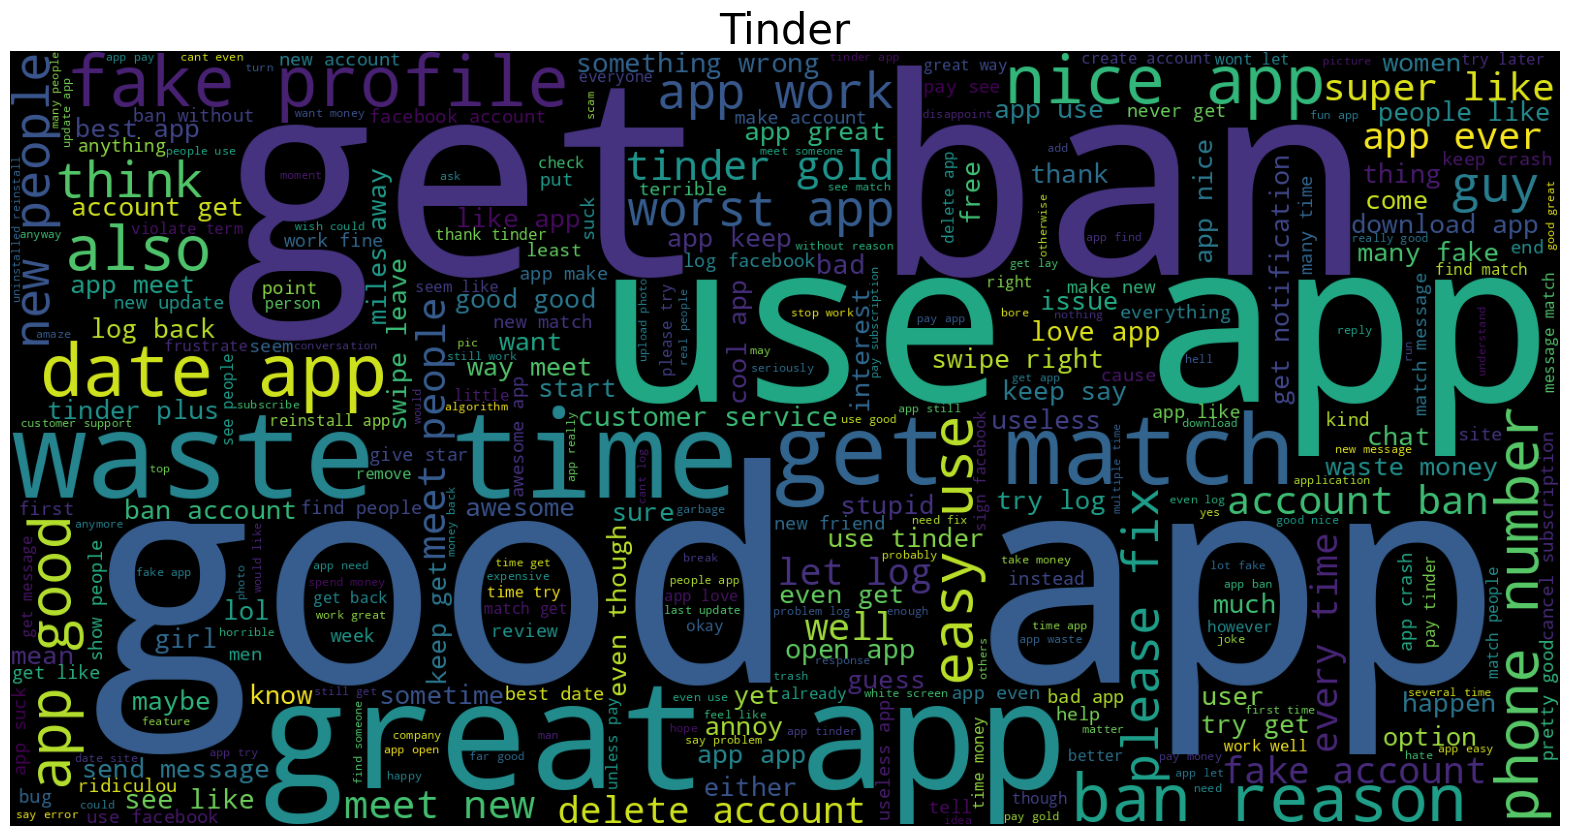

In [17]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=stop_words).generate(str(" ".join(tinder.clean_text)))
plt.axis('off')
plt.title('Tinder', fontsize=30)
plt.imshow(wordcloud)
plt.show()

# Sentiment Analysis - Vader Sentiment

In [18]:
sentiment = pd.DataFrame(columns=['bumble','hinge','match','tinder'], index=['positive','neutral','negative'])

In [19]:
analyzer = SentimentIntensityAnalyzer()

def format_output(output_dict):

    polarity = "neutral"
    if(output_dict['compound']>= 0.05):
        polarity = "positive"

    elif(output_dict['compound']<= -0.05):
        polarity = "negative"

    return polarity

def predict_sentiment(text):

    output_dict =  analyzer.polarity_scores(text)
    return format_output(output_dict)

In [20]:
# bumble
bumble["vader_prediction"] = bumble["clean_text"].apply(predict_sentiment)

polar,freq = np.unique(bumble["vader_prediction"],return_counts=True)

negative = round((freq[0]/(sum(freq))*100),1)
neutral = round((freq[1]/(sum(freq))*100),1)
positive = round((freq[2]/(sum(freq))*100),1)


sentiment['bumble'] = [positive,neutral,negative]
print(f"Negative : {negative}\nNeutral  : {neutral}\nPositive : {positive}")

Negative : 26.7
Neutral  : 17.9
Positive : 55.4


In [21]:
# hinge
hinge["vader_prediction"] = hinge["clean_text"].apply(predict_sentiment)

polar,freq = np.unique(hinge["vader_prediction"],return_counts=True)

negative = round((freq[0]/(sum(freq))*100),1)
neutral = round((freq[1]/(sum(freq))*100),1)
positive = round((freq[2]/(sum(freq))*100),1)


sentiment['hinge'] = [positive,neutral,negative]
print(f"Negative : {negative}\nNeutral  : {neutral}\nPositive : {positive}")

Negative : 23.3
Neutral  : 15.5
Positive : 61.3


In [22]:
# matchdating
matchdating["vader_prediction"] = matchdating["clean_text"].apply(predict_sentiment)

polar,freq = np.unique(matchdating["vader_prediction"],return_counts=True)

negative = round((freq[0]/(sum(freq))*100),1)
neutral = round((freq[1]/(sum(freq))*100),1)
positive = round((freq[2]/(sum(freq))*100),1)


sentiment['match'] = [positive,neutral,negative]
print(f"Negative : {negative}\nNeutral  : {neutral}\nPositive : {positive}")

Negative : 25.3
Neutral  : 19.2
Positive : 55.5


In [23]:
# tinder
tinder["vader_prediction"] = tinder["clean_text"].apply(predict_sentiment)

polar,freq = np.unique(tinder["vader_prediction"],return_counts=True)

negative = round((freq[0]/(sum(freq))*100),1)
neutral = round((freq[1]/(sum(freq))*100),1)
positive = round((freq[2]/(sum(freq))*100),1)


sentiment['tinder'] = [positive,neutral,negative]
print(f"Negative : {negative}\nNeutral  : {neutral}\nPositive : {positive}")

Negative : 27.4
Neutral  : 23.4
Positive : 49.2


In [24]:
# Save

bumble.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/bumble_new.csv', index=False)
hinge.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/hinge_new.csv', index=False)
matchdating.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/match_new.csv', index=False)
tinder.to_csv('/content/drive/MyDrive/Dating_App/Google Reviews/tinder_new.csv', index=False)

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


label = ['Positive', 'Negative', 'Neutral']

# Define a color map for each label
color_map = {
    'Positive': 'teal',  # Blue
    'Negative': 'crimson',  # Red
    'Neutral': 'orange'    # Orange
}

# Create the subplots with a 1x4 grid of pie plots
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add the four pie plots to the subplots
for idx, sentiment_type in enumerate(['bumble', 'hinge', 'match', 'tinder']):
    values = sentiment[sentiment_type]
    colors = [color_map[label[i]] for i in range(len(label))]

    fig.add_trace(go.Pie(labels=label, values=values, hole=0.6, title=sentiment_type.capitalize(), title_font=dict(size=30, color='maroon'),
                         textinfo='percent', hoverinfo='percent+label', textposition='inside', textfont=dict(color='white', size=35),
                         marker=dict(colors=colors)), row=1, col=idx + 1)

# Set the title of the subplots and adjust the layout
# fig.update_layout(title = dict(text="Sentiment Analysis",
#                   font_size=25, x=0.5, font_color='maroon'))

fig.update_layout(showlegend=False)

# fig.update_layout(
#     legend=dict(
#         font=dict(size=25, color='maroon')))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

# Show the plot
fig.show()

fig.write_image("sentiment_analysis.png", width=1200, height=600, scale=2)


In [29]:
bumble.shape

(135249, 13)

# Sentiment Analysis - RoBERTa Sentiment

In [26]:
sentiment = pd.DataFrame(columns=['bumble','hinge','match','tinder'], index=['positive','neutral','negative'])

In [28]:
# bumble

polar,freq = np.unique(bumble["Roberta Prediction"],return_counts=True)

negative = round((freq[0]/(sum(freq))*100),1)
neutral = round((freq[1]/(sum(freq))*100),1)
positive = round((freq[2]/(sum(freq))*100),1)

sentiment['bumble'] = [positive,neutral,negative]
print(f"Negative : {negative}\nNeutral  : {neutral}\nPositive : {positive}")

In [ ]:
# hinge

polar,freq = np.unique(hinge["Roberta Prediction"],return_counts=True)

negative = round((freq[0]/(sum(freq))*100),1)
neutral = round((freq[1]/(sum(freq))*100),1)
positive = round((freq[2]/(sum(freq))*100),1)


sentiment['hinge'] = [positive,neutral,negative]
print(f"Negative : {negative}\nNeutral  : {neutral}\nPositive : {positive}")

Negative : 43.3
Neutral  : 11.9
Positive : 44.8


In [ ]:
# matchdating
polar,freq = np.unique(matchdating["Roberta Prediction"],return_counts=True)

negative = round((freq[0]/(sum(freq))*100),1)
neutral = round((freq[1]/(sum(freq))*100),1)
positive = round((freq[2]/(sum(freq))*100),1)


sentiment['match'] = [positive,neutral,negative]
print(f"Negative : {negative}\nNeutral  : {neutral}\nPositive : {positive}")

Negative : 48.6
Neutral  : 17.6
Positive : 33.8


In [ ]:
# tinder
polar,freq = np.unique(tinder["Roberta Prediction"],return_counts=True)

negative = round((freq[0]/(sum(freq))*100),1)
neutral = round((freq[1]/(sum(freq))*100),1)
positive = round((freq[2]/(sum(freq))*100),1)


sentiment['tinder'] = [positive,neutral,negative]
print(f"Negative : {negative}\nNeutral  : {neutral}\nPositive : {positive}")

Negative : 45.9
Neutral  : 16.7
Positive : 37.3


In [ ]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# label = ['Positive', 'Neutral', 'Negative']

# # Create the subplots with a 1x4 grid of pie plots
# fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# # Add the four pie plots to the subplots
# fig.add_trace(go.Pie(labels=label, values=sentiment['bumble'], hole=0.6, title='Bumble', title_font=dict(size=30, color='maroon'),
#                      textinfo='percent', hoverinfo='percent+label', textposition='inside', textfont=dict(color='white', size=35)),
#               row=1, col=1)

# fig.add_trace(go.Pie(labels=label, values=sentiment['hinge'], hole=0.6, title='Hinge', title_font=dict(size=30, color='maroon'),
#                      textinfo='percent', hoverinfo='percent+label', textposition='inside', textfont=dict(color='white', size=35)),
#               row=1, col=2)

# fig.add_trace(go.Pie(labels=label, values=sentiment['match'], hole=0.6, title='Match', title_font=dict(size=30, color='maroon'),
#                      textinfo='percent', hoverinfo='percent+label', textposition='inside', textfont=dict(color='white', size=35)),
#               row=1, col=3)

# fig.add_trace(go.Pie(labels=label, values=sentiment['tinder'], hole=0.6, title='Tinder', title_font=dict(size=30, color='maroon'),
#                      textinfo='percent', hoverinfo='percent+label', textposition='inside', textfont=dict(color='white', size=35)),
#               row=1, col=4)

# # Set the title of the subplots and adjust the layout
# # fig.update_layout(title = dict(text="Sentiment Analysis",
# #                   font_size=25, x=0.5, font_color='maroon'))

# # fig.update_layout(showlegend=True)

# fig.update_layout(
#     legend=dict(
#         font=dict(size=25, color='maroon')))

# fig.update_layout(
#     paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
#     plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
# )

# fig.write_image("roberta_sentiment_analysis.png", width=1200, height=600, scale=2)

# # Show the plot
# fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


label = ['Positive', 'Negative', 'Neutral']

# Define a color map for each label
color_map = {
    'Positive': 'teal',  # Blue
    'Negative': 'crimson',  # Red
    'Neutral': 'orange'    # Orange
}

# Create the subplots with a 1x4 grid of pie plots
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add the four pie plots to the subplots
for idx, sentiment_type in enumerate(['bumble', 'hinge', 'match', 'tinder']):
    values = sentiment[sentiment_type]
    colors = [color_map[label[i]] for i in range(len(label))]

    fig.add_trace(go.Pie(labels=label, values=values, hole=0.6, title=sentiment_type.capitalize(), title_font=dict(size=30, color='maroon'),
                         textinfo='percent', hoverinfo='percent+label', textposition='inside', textfont=dict(color='white', size=35),
                         marker=dict(colors=colors)), row=1, col=idx + 1)

# Set the title of the subplots and adjust the layout
# fig.update_layout(title = dict(text="Sentiment Analysis",
#                   font_size=25, x=0.5, font_color='maroon'))

fig.update_layout(showlegend=False)

# fig.update_layout(
#     legend=dict(
#         font=dict(size=25, color='maroon')))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

# Show the plot
fig.show()

fig.write_image("roberta_sentiment_analysis.png", width=1200, height=600, scale=2)


# Seperate words based on Sentiment

## Bumble

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

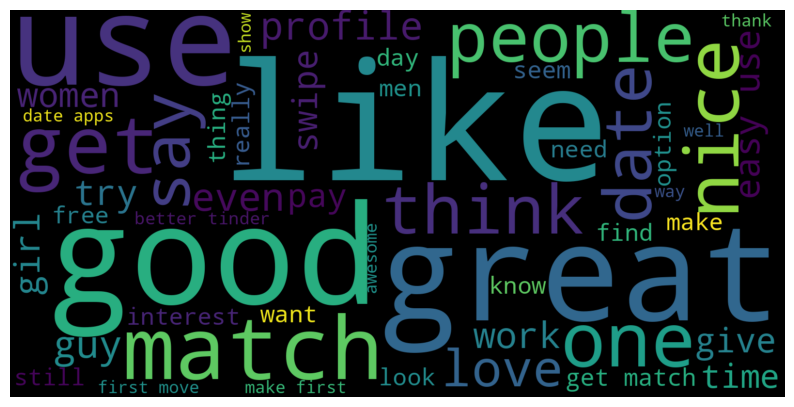

In [ ]:
bumble_positive = bumble[bumble['vader_prediction']=='positive']['clean_text']
stop_words.update(["app", "bumble", 'also', 'would'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words, background_color='rgba(0, 0, 0, 0)').generate(str(" ".join(bumble_positive)))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

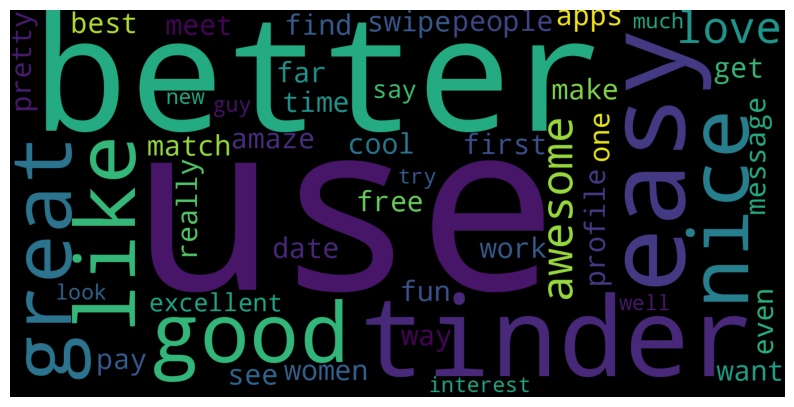

In [ ]:
# Create the TF-IDF matrix
max_df = 0.8
min_df = 2
ngram_range = (1, 2)

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=list(stop_words), ngram_range=ngram_range)
tfidf_matrix = vectorizer.fit_transform(bumble_positive)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 50 words by TF-IDF score
top_words = []
scores = tfidf_matrix.sum(axis=0)
scores = np.array(scores)[0]
top_indices = np.argsort(scores)[::-1][:50]
for i in top_indices:
  top_words.append(feature_names[i])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words).generate(" ".join(top_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

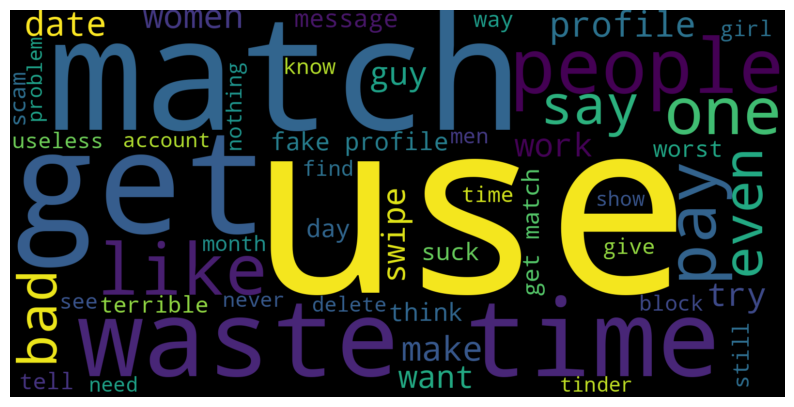

In [ ]:
bumble_negative = bumble[bumble['vader_prediction']=='negative']['clean_text']
stop_words.update(["app", "bumble", 'also', 'would'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words, background_color='rgba(0, 0, 0, 0)').generate(str(" ".join(bumble_negative)))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

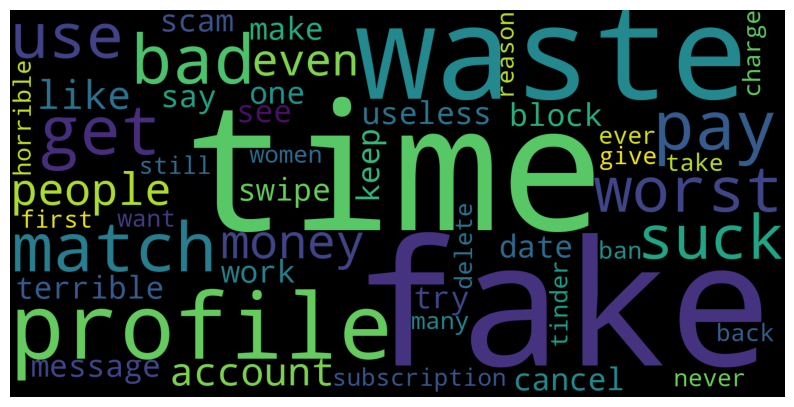

In [ ]:
# Create the TF-IDF matrix
max_df = 0.8
min_df = 2
ngram_range = (1, 2)

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=list(stop_words), ngram_range=ngram_range)
tfidf_matrix = vectorizer.fit_transform(bumble_negative)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 50 words by TF-IDF score
top_words = []
scores = tfidf_matrix.sum(axis=0)
scores = np.array(scores)[0]
top_indices = np.argsort(scores)[::-1][:50]
for i in top_indices:
  top_words.append(feature_names[i])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words).generate(" ".join(top_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Hinge

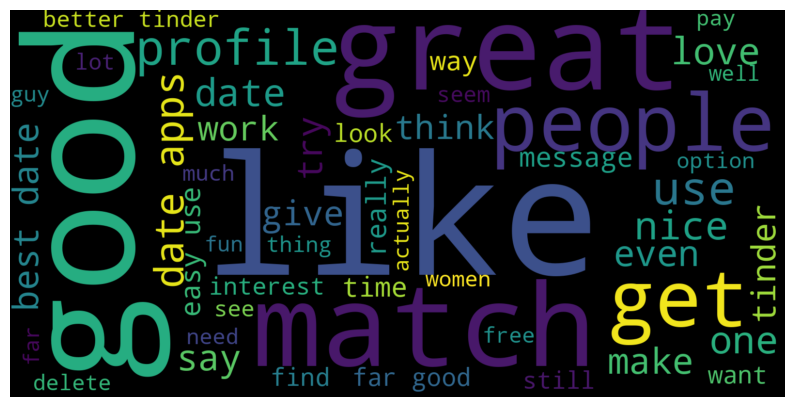

In [ ]:
hinge_positive = hinge[hinge['vader_prediction']=='positive']['clean_text']
stop_words.update(['hinge'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words, background_color='rgba(0, 0, 0, 0)').generate(str(" ".join(hinge_positive)))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

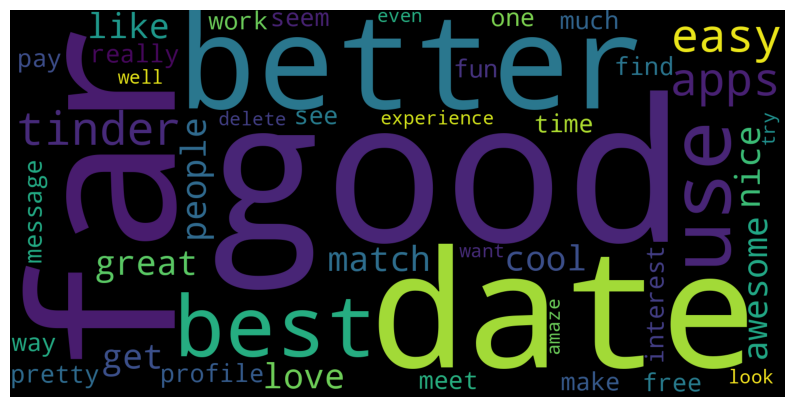

In [ ]:
# Create the TF-IDF matrix
max_df = 0.8
min_df = 2
ngram_range = (1, 2)

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=list(stop_words), ngram_range=ngram_range)
tfidf_matrix = vectorizer.fit_transform(hinge_positive)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 50 words by TF-IDF score
top_words = []
scores = tfidf_matrix.sum(axis=0)
scores = np.array(scores)[0]
top_indices = np.argsort(scores)[::-1][:50]
for i in top_indices:
  top_words.append(feature_names[i])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words).generate(" ".join(top_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

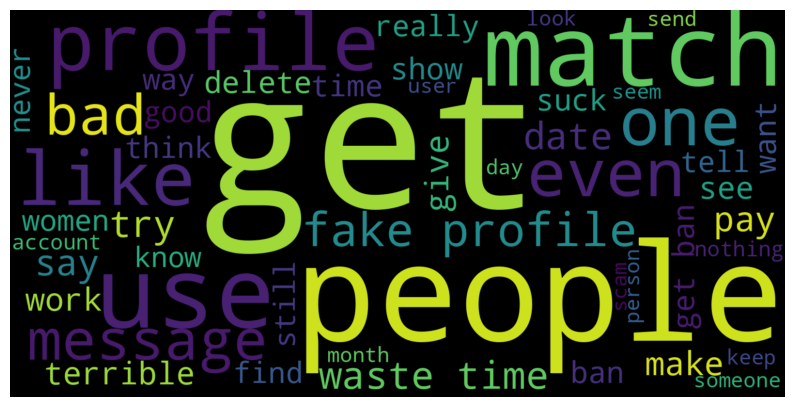

In [ ]:
hinge_negative = hinge[hinge['vader_prediction']=='negative']['clean_text']
stop_words.update(["app", "bumble", 'also', 'would'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words, background_color='rgba(0, 0, 0, 0)').generate(str(" ".join(hinge_negative)))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

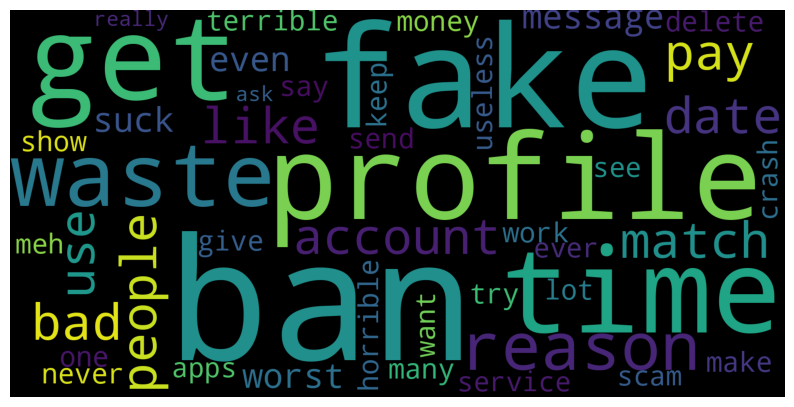

In [ ]:
# Create the TF-IDF matrix
max_df = 0.8
min_df = 2
ngram_range = (1, 2)

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=list(stop_words), ngram_range=ngram_range)
tfidf_matrix = vectorizer.fit_transform(hinge_negative)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 50 words by TF-IDF score
top_words = []
scores = tfidf_matrix.sum(axis=0)
scores = np.array(scores)[0]
top_indices = np.argsort(scores)[::-1][:50]
for i in top_indices:
  top_words.append(feature_names[i])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words).generate(" ".join(top_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Match

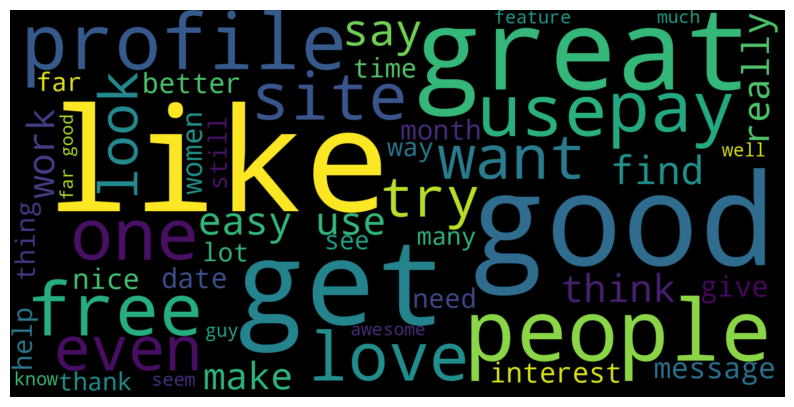

In [ ]:
matchdating_positive = matchdating[matchdating['vader_prediction']=='positive']['clean_text']
stop_words.update(['match'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words, background_color='rgba(0, 0, 0, 0)').generate(str(" ".join(matchdating_positive)))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

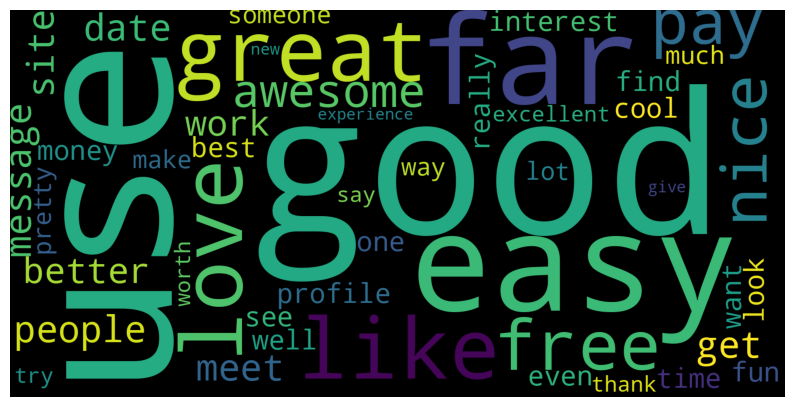

In [ ]:
# Create the TF-IDF matrix
max_df = 0.8
min_df = 2
ngram_range = (1, 2)

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=list(stop_words), ngram_range=ngram_range)
tfidf_matrix = vectorizer.fit_transform(matchdating_positive)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 50 words by TF-IDF score
top_words = []
scores = tfidf_matrix.sum(axis=0)
scores = np.array(scores)[0]
top_indices = np.argsort(scores)[::-1][:50]
for i in top_indices:
  top_words.append(feature_names[i])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words).generate(" ".join(top_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

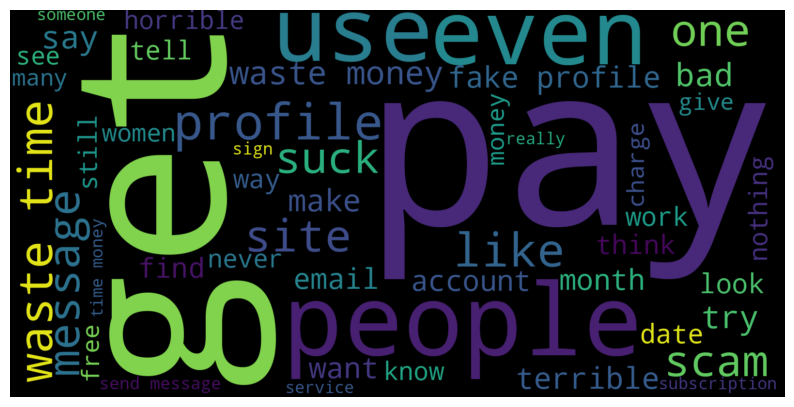

In [ ]:
matchdating_negative = matchdating[matchdating['vader_prediction']=='negative']['clean_text']
stop_words.update(["app", "bumble", 'also', 'would'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words, background_color='rgba(0, 0, 0, 0)').generate(str(" ".join(matchdating_negative)))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

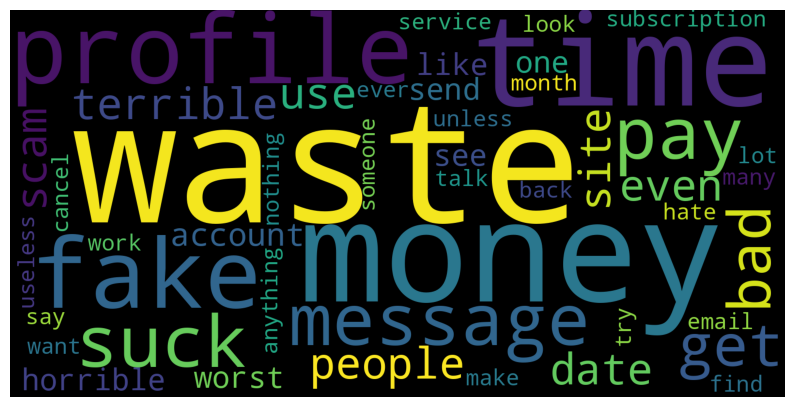

In [ ]:
# Create the TF-IDF matrix
max_df = 0.8
min_df = 2
ngram_range = (1, 2)

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=list(stop_words), ngram_range=ngram_range)
tfidf_matrix = vectorizer.fit_transform(matchdating_negative)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 50 words by TF-IDF score
top_words = []
scores = tfidf_matrix.sum(axis=0)
scores = np.array(scores)[0]
top_indices = np.argsort(scores)[::-1][:50]
for i in top_indices:
  top_words.append(feature_names[i])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words).generate(" ".join(top_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

## Tinder

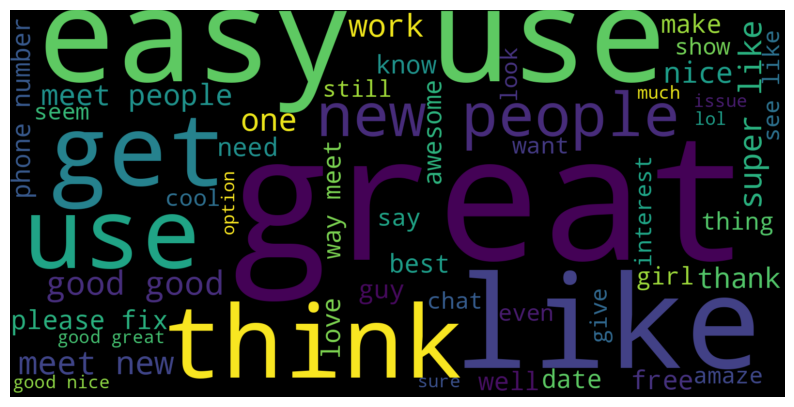

In [ ]:
tinder_positive = tinder[tinder['vader_prediction']=='positive']['clean_text']
stop_words.update(['tinder'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words, background_color='rgba(0, 0, 0, 0)').generate(str(" ".join(tinder_positive)))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

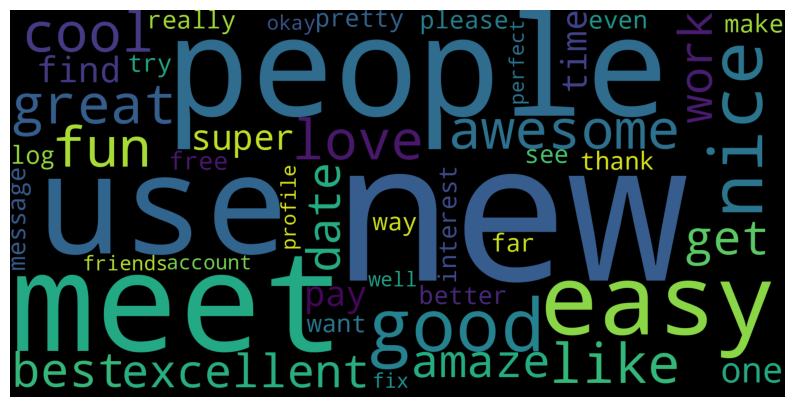

In [ ]:
# Create the TF-IDF matrix
max_df = 0.8
min_df = 2
ngram_range = (1, 2)

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=list(stop_words), ngram_range=ngram_range)
tfidf_matrix = vectorizer.fit_transform(tinder_positive)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 50 words by TF-IDF score
top_words = []
scores = tfidf_matrix.sum(axis=0)
scores = np.array(scores)[0]
top_indices = np.argsort(scores)[::-1][:50]
for i in top_indices:
  top_words.append(feature_names[i])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words).generate(" ".join(top_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

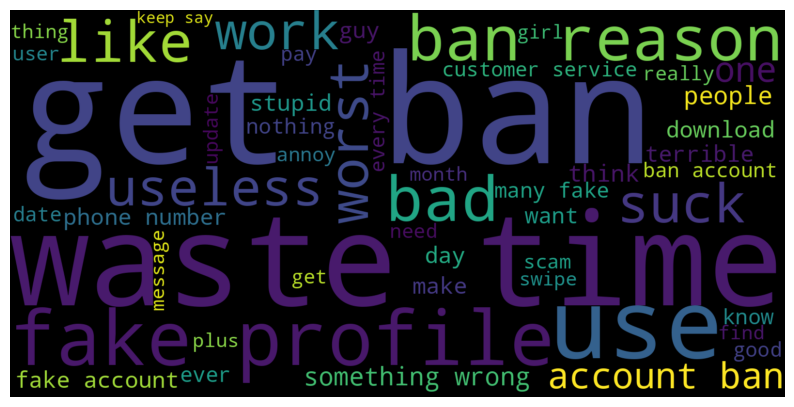

In [ ]:
tinder_negative = tinder[tinder['vader_prediction']=='negative']['clean_text']
stop_words.update(["app", "bumble", 'also', 'would'])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words, background_color='rgba(0, 0, 0, 0)').generate(str(" ".join(tinder_negative)))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

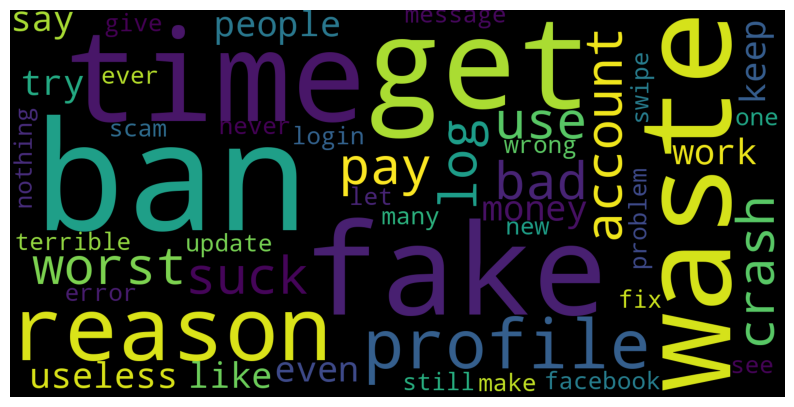

In [ ]:
# Create the TF-IDF matrix
max_df = 0.8
min_df = 2
ngram_range = (1, 2)

vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words=list(stop_words), ngram_range=ngram_range)
tfidf_matrix = vectorizer.fit_transform(tinder_negative)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 50 words by TF-IDF score
top_words = []
scores = tfidf_matrix.sum(axis=0)
scores = np.array(scores)[0]
top_indices = np.argsort(scores)[::-1][:50]
for i in top_indices:
  top_words.append(feature_names[i])

plt.figure(figsize=(10,10))
wordcloud = WordCloud(min_font_size=5, max_words=50, width=1600 , height=800 , stopwords=stop_words).generate(" ".join(top_words))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Rating

In [ ]:
rating = pd.DataFrame(columns=['bumble','hinge','match','tinder'], index=['positive','neutral','negative'])

In [ ]:
# Bumble

score,freq = np.unique(bumble["score"],return_counts=True)
positive = round((freq[4]+freq[3])/(sum(freq))*100,1)
negative = round((freq[0]+freq[1])/(sum(freq))*100,1)
neutral = round((freq[2])/(sum(freq))*100,1)

rating['bumble'] = [positive,neutral,negative]

In [ ]:
# Hinge

score,freq = np.unique(hinge["score"],return_counts=True)
positive = round((freq[4]+freq[3])/(sum(freq))*100,1)
negative = round((freq[0]+freq[1])/(sum(freq))*100,1)
neutral = round((freq[2])/(sum(freq))*100,1)

rating['hinge'] = [positive,neutral,negative]

In [ ]:
# Match

score,freq = np.unique(matchdating["score"],return_counts=True)
positive = round((freq[4]+freq[3])/(sum(freq))*100,1)
negative = round((freq[0]+freq[1])/(sum(freq))*100,1)
neutral = round((freq[2])/(sum(freq))*100,1)

rating['match'] = [positive,neutral,negative]

In [ ]:
# Tinder

score,freq = np.unique(tinder["score"],return_counts=True)
positive = round((freq[4]+freq[3])/(sum(freq))*100,1)
negative = round((freq[0]+freq[1])/(sum(freq))*100,1)
neutral = round((freq[2])/(sum(freq))*100,1)

rating['tinder'] = [positive,neutral,negative]

In [ ]:
label = ['positive', 'neutral', 'negative']
rating = rating.reindex(index=label)
rating

bumble  hinge  match  tinder
positive    42.2   50.0   23.2    20.2
neutral      8.5    9.9    9.5     7.1
negative    49.4   40.0   38.7    37.9

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


label = ['Positive', 'Negative', 'Neutral']

# Define a color map for each label
color_map = {
    'Positive': 'teal',  # Blue
    'Negative': 'crimson',  # Red
    'Neutral': 'orange'    # Orange
}

# Create the subplots with a 1x4 grid of pie plots
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add the four pie plots to the subplots
for idx, rating_type in enumerate(['bumble', 'hinge', 'match', 'tinder']):
    values = rating[rating_type]
    colors = [color_map[label[i]] for i in range(len(label))]

    fig.add_trace(go.Pie(labels=label, values=values, hole=0.6, title=rating_type.capitalize(), title_font=dict(size=30, color='maroon'),
                         textinfo='percent', hoverinfo='percent+label', textposition='inside', textfont=dict(color='white', size=35),
                         marker=dict(colors=colors)), row=1, col=idx + 1)

# Set the title of the subplots and adjust the layout
# fig.update_layout(title = dict(text="Sentiment Analysis",
#                   font_size=25, x=0.5, font_color='maroon'))

fig.update_layout(showlegend=True)

fig.update_layout(
    legend=dict(
        font=dict(size=25, color='maroon')))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

# Show the plot
fig.show()

fig.write_image("rating_analysis.png", width=1200, height=600, scale=2)


In [ ]:
# label = ['Positive', 'Neutral', 'Negative']
# colors = ['#636EF9', '#00CC96', '#e74c3c']

# # Create the subplots with a 1x4 grid of pie plots
# fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# # Add the four pie plots to the subplots
# fig.add_trace(go.Pie(labels=label, values=rating['bumble'].astype(int), hole=0.6, title='Bumble', title_font=dict(size=30, color='maroon'), textinfo='percent',
#                      textfont=dict(color='black', size=25), marker=dict(colors=colors)), row=1, col=1)
# fig.add_trace(go.Pie(labels=label, values=rating['hinge'], hole=0.6, title='Hinge', title_font=dict(size=30, color='maroon'), textinfo='percent',
#                      textfont=dict(color='black', size=25)), row=1, col=2)
# fig.add_trace(go.Pie(labels=label, values=rating['match'], hole=0.6, title='Match', title_font=dict(size=30, color='maroon'), textinfo='percent',
#                      textfont=dict(color='black', size=25)), row=1, col=3)
# fig.add_trace(go.Pie(labels=label, values=rating['tinder'], hole=0.6, title='Tinder', title_font=dict(size=30, color='maroon'), textinfo='percent',
#                      textfont=dict(color='black', size=25)), row=1, col=4)

# # Set the title of the subplots and adjust the layout
# # Set the title of the subplots and adjust the layout
# fig.update_layout(title = dict(text="Rating Analysis",
#                   font_size=35, x=0.5, font_color='maroon'))

# fig.update_layout(showlegend=True)

# fig.update_layout(
#     legend=dict(
#         font=dict( size=25, color='maroon' )))

# fig.update_layout(
#     paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
#     plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
# )

# # Show the plot
# fig.show()

# Rating over time

In [ ]:
ratings = {'Bumble': bumble['score'].mean(), 'Hinge': hinge['score'].mean(), 'Match': matchdating['score'].mean(), 'Tinder': tinder['score'].mean()}

# Create the subplots with a 1x4 grid of pie plots
fig = make_subplots(rows=4, cols=1, specs=[[{'type': 'indicator'}], [{'type': 'indicator'}], [{'type': 'indicator'}], [{'type': 'indicator'}]])

# Add the four pie plots to the subplots
fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = round(bumble['score'].mean(),2),
    title = {'text': 'Bumble', 'font': {'size': 25, 'color':'maroon'}},
    gauge = {'axis': {'visible': False}, 'bar': {'color': '#ab63fa', 'thickness':0.7}}), row=1, col=1)
fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = round(hinge['score'].mean(),2),
    title = {'text': 'Hinge', 'font': {'size': 25, 'color':'maroon'}},
    gauge = {'axis': {'visible': False}, 'bar': {'color': '#ab63fa', 'thickness':0.7}}), row=2, col=1)
fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = round(matchdating['score'].mean(),2),
    title = {'text': 'Match', 'font': {'size': 25, 'color':'maroon'}},
    gauge = {'axis': {'visible': False}, 'bar': {'color': '#ab63fa', 'thickness':0.7}}), row=3, col=1)
fig.add_trace(go.Indicator(
    mode = "gauge+number",
    value = round(tinder['score'].mean(),2),
    title = {'text': 'Tinder', 'font': {'size': 25, 'color':'maroon'}},
    gauge = {'axis': {'visible': False}, 'bar': {'color': '#ab63fa', 'thickness':0.7}}), row=4, col=1)

# Set the title of the subplots and adjust the layout
fig.update_layout(title_text="Average Rating\n",
                  title_font_size=35,
                  title_x=0.5,
                  showlegend=False,
                  height=800,
                  width=450, font_color='maroon')


fig.update_layout(showlegend=True)

fig.update_layout(
    legend=dict(
        font=dict( size=25, color='maroon' )))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

# Show the plot
fig.show()

In [ ]:
# Split date

# Bumble
bumble[["date",'time']] = bumble["at"].str.split(" ", expand = True)
bumble[['year','month','day']]=bumble['date'].str.split("-",expand=True)

# Hinge
hinge[["date",'time']] = hinge["at"].str.split(" ", expand = True)
hinge[['year','month','day']]=hinge['date'].str.split("-",expand=True)

# Match
matchdating[["date",'time']] = matchdating["at"].str.split(" ", expand = True)
matchdating[['year','month','day']]=matchdating['date'].str.split("-",expand=True)

# Tinder
tinder[["date",'time']] = tinder["at"].str.split(" ", expand = True)
tinder[['year','month','day']]=tinder['date'].str.split("-",expand=True)

In [ ]:
mean_rating = pd.DataFrame(columns=['bumble','hinge','match','tinder'], index=['before','during','after'])

In [ ]:
# bumble

before_pandemic_bumble = bumble[(bumble['date'] >= '2019-01-01') & (bumble['date'] < '2020-01-01')]
mean_before_bumble = before_pandemic_bumble['score'].mean().round(2)

during_pandemic_bumble = bumble[(bumble['date'] >= '2020-01-01') & (bumble['date'] <= '2021-06-01')]
mean_during_bumble = during_pandemic_bumble['score'].mean().round(2)

after_pandemic_bumble = bumble[bumble['date'] > '2021-06-01']
mean_after_bumble = after_pandemic_bumble['score'].mean().round(2)

mean_rating['bumble'] = [mean_before_bumble, mean_during_bumble, mean_after_bumble]

In [ ]:
# hinge

before_pandemic_hinge = hinge[(hinge['date'] >= '2019-01-01') & (hinge['date'] < '2020-01-01')]
mean_before_hinge = before_pandemic_hinge['score'].mean().round(2)

during_pandemic_hinge = hinge[(hinge['date'] >= '2020-01-01') & (hinge['date'] <= '2021-06-01')]
mean_during_hinge = during_pandemic_hinge['score'].mean().round(2)

after_pandemic_hinge = hinge[hinge['date'] > '2021-06-01']
mean_after_hinge = after_pandemic_hinge['score'].mean().round(2)

mean_rating['hinge'] = [mean_before_hinge, mean_during_hinge, mean_after_hinge]

In [ ]:
# match

before_pandemic_match = matchdating[(matchdating['date'] >= '2019-01-01') & (matchdating['date'] < '2020-01-01')]
mean_before_match = before_pandemic_match['score'].mean().round(2)

during_pandemic_match = matchdating[(matchdating['date'] >= '2020-01-01') & (matchdating['date'] <= '2021-06-01')]
mean_during_match = during_pandemic_match['score'].mean().round(2)

after_pandemic_match = matchdating[matchdating['date'] > '2021-06-01']
mean_after_match = after_pandemic_match['score'].mean().round(2)

mean_rating['match'] = [mean_before_match, mean_during_match, mean_after_match]

In [ ]:
# tinder

before_pandemic_tinder = tinder[(tinder['date'] >= '2019-01-01') & (tinder['date'] < '2020-01-01')]
mean_before_tinder = before_pandemic_tinder['score'].mean().round(2)

during_pandemic_tinder = tinder[(tinder['date'] >= '2020-01-01') & (tinder['date'] <= '2021-06-01')]
mean_during_tinder = during_pandemic_tinder['score'].mean().round(2)

after_pandemic_tinder = tinder[tinder['date'] > '2021-06-01']
mean_after_tinder = after_pandemic_tinder['score'].mean().round(2)

mean_rating['tinder'] = [mean_before_tinder, mean_during_tinder, mean_after_tinder]

In [ ]:
# x = mean_rating.columns.tolist()

# Define the data
x = ['Bumble', 'Hinge', 'Match', 'Tinder']
y_before = mean_rating.loc['before',:].tolist()
y_during = mean_rating.loc['during',:].tolist()
y_after = mean_rating.loc['after',:].tolist()


# Create the traces
trace_before = go.Bar(
    x=x,
    y=y_before,
    name='Before',
    marker=dict(color='#636EF9'), width=0.2
)
trace_during = go.Bar(
    x=x,
    y=y_during,
    name='During',
    marker=dict(color='#00CC96'), width=0.2
)
trace_after = go.Bar(
    x=x,
    y=y_after,
    name='After',
    marker=dict(color='#e74c3c'), width=0.2
)

# Create the layout
layout = go.Layout(
    title=dict(text='Effect of Pandemic',x=0.5, font=dict(size=35, color='maroon')),
    xaxis=dict(tickfont=dict(size=25, color='maroon')),
    yaxis=dict(title=dict(text='Average Rating', font=dict(size=25, color='maroon'))),
    plot_bgcolor='rgba(0,0,0,0)',
    barmode='group',
    bargap=0.5,
    bargroupgap=0.9,
        height=500,
    width=800
)

# Combine the data and layout into a figure
fig = go.Figure(data=[trace_before, trace_during, trace_after], layout=layout)

fig.update_xaxes(tickfont=dict(size=25))

fig.update_layout(showlegend=True)

fig.update_layout(
    legend=dict(
        font=dict( size=25, color='maroon' )))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

# Show the figure
fig.show()

In [ ]:
_,bumble_frq = np.unique(bumble['date'], return_counts=True)
_,hinge_frq = np.unique(hinge['date'], return_counts=True)
_,matchdating_frq = np.unique(matchdating['date'], return_counts=True)
_,tinder_frq = np.unique(tinder['date'], return_counts=True)

In [ ]:
# Removing outliers
bumble_frq = [i for i in bumble_frq if i<300]
hinge_frq = [i for i in hinge_frq if i<300]
matchdating_frq = [i for i in matchdating_frq if i<300]
tinder_frq = [i for i in tinder_frq if i<500]

In [ ]:
from datetime import datetime

# Convert date column to datetime object
bumble['date'] = pd.to_datetime(bumble['date'])
hinge['date'] = pd.to_datetime(hinge['date'])
matchdating['date'] = pd.to_datetime(matchdating['date'])
tinder['date'] = pd.to_datetime(tinder['date'])

# Group by date and calculate the mean rating
bumble_trend = bumble.groupby('date')['score'].mean().reset_index()
hinge_trend = hinge.groupby('date')['score'].mean().reset_index()
matchdating_trend = matchdating.groupby('date')['score'].mean().reset_index()
tinder_trend = tinder.groupby('date')['score'].mean().reset_index()

# From 2018
bumble_trend =bumble_trend[bumble_trend['date'] >= datetime(2018, 1, 1)]
hinge_trend =hinge_trend[hinge_trend['date'] >= datetime(2018, 1, 1)]
matchdating_trend =matchdating_trend[matchdating_trend['date'] >= datetime(2018, 1, 1)]
tinder_trend =tinder_trend[tinder_trend['date'] >= datetime(2018, 1, 1)]

# Create subplots
fig = make_subplots(rows=4, cols=1, subplot_titles=("Bumble", "Hinge", "Match", "Tinder"), specs=[[{"secondary_y": True}]]*4,
              shared_xaxes=True, shared_yaxes=True)

fig.add_trace(go.Scatter(x=bumble_trend['date'], y=bumble_frq, mode='lines', name='line1', line=dict(color='#81DFCC', width=2)), secondary_y=True, row=1, col=1)
fig.add_trace(go.Scatter(x=bumble_trend['date'], y=bumble_trend['score'], mode='markers', name='Bumble', line=dict(color='#EF553C')), secondary_y=False, row=1, col=1)

fig.add_trace(go.Scatter(x=hinge_trend['date'], y=hinge_trend['score'], mode='markers', name='Hinge', line=dict(color='#AB63FA')), secondary_y=False, row=2, col=1)
fig.add_trace(go.Scatter(x=hinge_trend['date'], y=hinge_frq, mode='lines', name='line2', line=dict(color='#81DFCC', width=2)), secondary_y=True, row=2, col=1)

fig.add_trace(go.Scatter(x=matchdating_trend['date'], y=matchdating_trend['score'], mode='markers', name='Match', line=dict(color='#FF6692')), secondary_y=False, row=3, col=1)
fig.add_trace(go.Scatter(x=matchdating_trend['date'], y=matchdating_frq, mode='lines', line=dict(color='#81DFCC', width=2), name='line3'), secondary_y=True, row=3, col=1)

fig.add_trace(go.Scatter(x=tinder_trend['date'], y=tinder_trend['score'], mode='markers', name='Tinder', line=dict(color='#636EF9')), secondary_y=False, row=4, col=1)
fig.add_trace(go.Scatter(x=tinder_trend['date'], y=tinder_frq, mode='lines', name='line4', line=dict(color='#81DFCC', width=2)), secondary_y=True, row=4, col=1)

# Update the layout
fig.update_layout(
    title=dict(text='Average Ratings and # of ratings over Time',x=0.5, font=dict(size=35, color='maroon')),
    height=1200, width=1000,
    plot_bgcolor='rgba(0,0,0,0)', showlegend=False)
fig.update_annotations(font_size=30)

fig.update_xaxes(showgrid=False, row=1, col=1)
fig.update_xaxes(showgrid=False, row=2, col=1)
fig.update_xaxes(showgrid=False, row=3, col=1)
fig.update_xaxes(showgrid=False, row=4, col=1)

fig.update_yaxes(title_text="# of Ratings",showgrid=False, range=[1, 150], row=1, col=1, secondary_y=True, title_font=dict(size=30))
fig.update_yaxes(title_text="# of Ratings",showgrid=False, range=[1, 150], row=2, col=1, secondary_y=True, title_font=dict(size=30))
fig.update_yaxes(title_text="# of Ratings",showgrid=False, range=[1, 40], row=3, col=1, secondary_y=True, title_font=dict(size=30))
fig.update_yaxes(title_text="# of Ratings",showgrid=False, range=[1, 300], row=4, col=1, secondary_y=True, title_font=dict(size=30))

fig.update_yaxes(title_text="Average Ratings",showgrid=True,  row=1, col=1, secondary_y=False, title_font=dict(size=30))
fig.update_yaxes(title_text="Average Ratings",showgrid=True,  row=2, col=1, secondary_y=False, title_font=dict(size=30))
fig.update_yaxes(title_text="Average Ratings",showgrid=True, row=3, col=1, secondary_y=False, title_font=dict(size=30))
fig.update_yaxes(title_text="Average Ratings",showgrid=True,  row=4, col=1, secondary_y=False, title_font=dict(size=30))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

fig.update_layout(font=dict(size=25, color="maroon"))

# Show the plot
fig.show()

In [ ]:
bumble['year-month'] = pd.to_datetime(bumble['date']).dt.strftime('%Y-%m')
hinge['year-month'] = pd.to_datetime(hinge['date']).dt.strftime('%Y-%m')
matchdating['year-month'] = pd.to_datetime(matchdating['date']).dt.strftime('%Y-%m')
tinder['year-month'] = pd.to_datetime(tinder['date']).dt.strftime('%Y-%m')

bumble['date'] = pd.to_datetime(bumble['date'])
hinge['date'] = pd.to_datetime(hinge['date'])
matchdating['date'] = pd.to_datetime(matchdating['date'])
tinder['date'] = pd.to_datetime(tinder['date'])

In [ ]:
# From 2018
bumble_trend =bumble[(bumble['date'] >= datetime(2018, 1, 1))&(bumble['date'] < datetime(2022, 6, 1))]
hinge_trend =hinge[(hinge['date'] >= datetime(2018, 1, 1)) & (hinge['date'] < datetime(2022, 6, 1))]
matchdating_trend =matchdating[(matchdating['date'] >= datetime(2018, 1, 1))&(matchdating['date'] < datetime(2022, 6, 1))]
tinder_trend =tinder[(tinder['date'] >= datetime(2018, 1, 1))&(tinder['date'] < datetime(2022, 6, 1))]

bumble_sentiment = bumble_trend.copy()
bumble_sentiment['sentiment'] = bumble_sentiment['score'].apply(lambda x: 'positive' if x >= 4 else 'neutral' if x == 3 else 'negative')

hinge_sentiment = hinge_trend.copy()
hinge_sentiment['sentiment'] = hinge_sentiment['score'].apply(lambda x: 'positive' if x >= 4 else 'neutral' if x == 3 else 'negative')

matchdating_sentiment = matchdating_trend.copy()
matchdating_sentiment['sentiment'] = matchdating_sentiment['score'].apply(lambda x: 'positive' if x >= 4 else 'neutral' if x == 3 else 'negative')

tinder_sentiment = tinder_trend.copy()
tinder_sentiment['sentiment'] = tinder_sentiment['score'].apply(lambda x: 'positive' if x >= 4 else 'neutral' if x == 3 else 'negative')

# Group by date and sentiment and count the number of reviews
bumble_grouped = bumble_sentiment.groupby(['year-month', 'sentiment']).size().reset_index(name='count')
hinge_grouped = hinge_sentiment.groupby(['year-month', 'sentiment']).size().reset_index(name='count')
match_grouped = matchdating_sentiment.groupby(['year-month', 'sentiment']).size().reset_index(name='count')
tinder_grouped = tinder_sentiment.groupby(['year-month', 'sentiment']).size().reset_index(name='count')

In [ ]:
fig = px.bar(bumble_grouped, x='year-month', y='count', color='sentiment', color_discrete_sequence=['#e74c3c','#00CC96','#636EF9'])

# update the layout
fig.update_layout(title=dict(text='Bumble',x=0.5, font=dict(size=25, color='maroon')),
    xaxis_title="Year-Month",
    yaxis_title="Count", height=300, width=600, showlegend=False
)
fig.update_annotations(font_size=20)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

fig.update_layout(font=dict(size=20, color="maroon"))
# display the chart
fig.show()

In [ ]:
fig = px.bar(hinge_grouped, x='year-month', y='count', color='sentiment', color_discrete_sequence=['#e74c3c','#00CC96','#636EF9'])

# update the layout
fig.update_layout(title=dict(text='Hinge',x=0.5, font=dict(size=25)),
    xaxis_title="Year-Month",
    yaxis_title="Count", height=300, width=600, showlegend=False
)
fig.update_annotations(font_size=20)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

fig.update_layout(font=dict(size=20, color="maroon"))
# display the chart
fig.show()

In [ ]:
fig = px.bar(match_grouped, x='year-month', y='count', color='sentiment', color_discrete_sequence=['#e74c3c','#00CC96','#636EF9'])

# update the layout
fig.update_layout(title=dict(text='Match',x=0.5, font=dict(size=25)),
    xaxis_title="Year-Month",
    yaxis_title="Count", height=300, width=600, showlegend=False
)
fig.update_annotations(font_size=20)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

fig.update_layout(font=dict(size=20, color="maroon"))
# display the chart
fig.show()

In [ ]:
fig = px.bar(tinder_grouped, x='year-month', y='count', color='sentiment', color_discrete_sequence=['#e74c3c','#00CC96','#636EF9'])

# update the layout
fig.update_layout(title=dict(text='Tinder',x=0.5, font=dict(size=25)),
    xaxis_title="Year-Month",
    yaxis_title="Count", height=300, width=600, showlegend=False
)
fig.update_annotations(font_size=20)
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', # Set the background color of the paper to transparent
    plot_bgcolor='rgba(0,0,0,0)' # Set the background color of the plot to transparent
)

fig.update_layout(font=dict(size=20, color="maroon"))
# display the chart
fig.show()